# **Analyze and Predict Borrower Default Risk Based on Financial and Demographic Factors**

# **1. Exploratory**

Import the required libraries

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

The data to work is located in CSV file

In [5]:
loan_default = pd.read_csv('/content/Loan_default.csv')

The first 5 rows

Before performing any operation with data, you need to take a look to ensure that everything is okay with the loaded data.

In the cell below, write a code to output the first 5 rows of the dataframe.

In [6]:
loan_default.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# **2. Data Cleaning**

## **2.1 Handle missing values and outliers.**

After importing the libraries and CSV files, we start to explore and clean the data as well as find missing values, duplicate data and outliers.

Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [7]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Show the basic descriptive statistics for the entire dataframe.

In [8]:
loan_default.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


Now we start checking for missing data.

In [9]:
missing_values = loan_default.isnull().sum()
print(missing_values)

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


Next we look to see if there is any duplicate data.

In [10]:
loan_default.duplicated().sum()

0

Next is to convert object data types to categories. It helps save memory and optimize performance in processing categorical data.

In [11]:
# Chuyển các cột sang dạng category
loan_default['EmploymentType'] = loan_default['EmploymentType'].astype('category')
loan_default['Education'] = loan_default['Education'].astype('category')
loan_default['MaritalStatus'] = loan_default['MaritalStatus'].astype('category')
loan_default['HasMortgage'] = loan_default['HasMortgage'].astype('category')
loan_default['HasDependents'] = loan_default['HasDependents'].astype('category')
loan_default['HasCoSigner'] = loan_default['HasCoSigner'].astype('category')
loan_default['LoanPurpose'] = loan_default['LoanPurpose'].astype('category')

Check again

In [12]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  object  
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

**Outliers Income**

Earnings may have outliers, especially very high or very low values, which may affect the model.

In [13]:
Q1 = loan_default['Income'].quantile(0.25)
Q3 = loan_default['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['Income'] >= lower_bound
cond2 = loan_default['Income'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Outliers LoanAmount**

Loan amounts that are unusually large or too small (like a value of 0) may be unreasonable. Check exceptions for values ​​that are too large or small.

In [14]:
Q1 = loan_default['LoanAmount'].quantile(0.25)
Q3 = loan_default['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['LoanAmount'] >= lower_bound
cond2 = loan_default['LoanAmount'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Ourliers CreditScore**

Verify that credit score values ​​are within reasonable ranges and that there are no credit score anomalies. Any values ​​that fall outside the range or deviate too far from the average may be outliers.

In [15]:
Q1 = loan_default['CreditScore'].quantile(0.25)
Q3 = loan_default['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['CreditScore'] >= lower_bound
cond2 = loan_default['CreditScore'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Ourliers Interest Rate**

Interest rates can also have outliers, especially when there are very high or very low interest rates. Check for interest rates that are too high or too low compared to the average.

In [16]:
Q1 = loan_default['InterestRate'].quantile(0.25)
Q3 = loan_default['InterestRate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['InterestRate'] >= lower_bound
cond2 = loan_default['InterestRate'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Ourliers DTI Ratio**

Debt-to-income ratio (DTIRatio) is usually in a reasonable range (0 - 1). If the value exceeds 1 or is too low, it is worth checking whether these values ​​are reasonable.

In [17]:
Q1 = loan_default['DTIRatio'].quantile(0.25)
Q3 = loan_default['DTIRatio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['DTIRatio'] >= lower_bound
cond2 = loan_default['DTIRatio'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Ourliers Months Employed**

If there are too many or zero months of service, consider whether these values ​​are reasonable.

In [18]:
Q1 = loan_default['MonthsEmployed'].quantile(0.25)
Q3 = loan_default['MonthsEmployed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['MonthsEmployed'] >= lower_bound
cond2 = loan_default['MonthsEmployed'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

**Ourliers Num Credit Lines**

This value may influence the assessment of a borrower's ability to repay.

In [19]:
Q1 = loan_default['NumCreditLines'].quantile(0.25)
Q3 = loan_default['NumCreditLines'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cond1 = loan_default['NumCreditLines'] >= lower_bound
cond2 = loan_default['NumCreditLines'] <= upper_bound

loan_default_clean = loan_default[cond1 & cond2]

Check again

In [20]:
loan_default_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  object  
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

The Loan ID column contains personal information that does not provide analytical meaning or contribute to building a machine learning model, so we can delete it.

In [21]:
loan_default_clean.drop('LoanID', axis = 1 , inplace = True)
loan_default_clean.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [22]:
loan_default_clean.to_csv('Cleaned_Loan_Data.csv', index=False)

## **2.2. Visualize Correlations**

Once the data has been cleaned and is ready for analysis through graphs and visualization, the correlation matrix is ​​an important step in exploring the relationships between variables.

<ipython-input-23-916fe2ab880e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Default', data =loan_default_clean, palette = 'inferno')


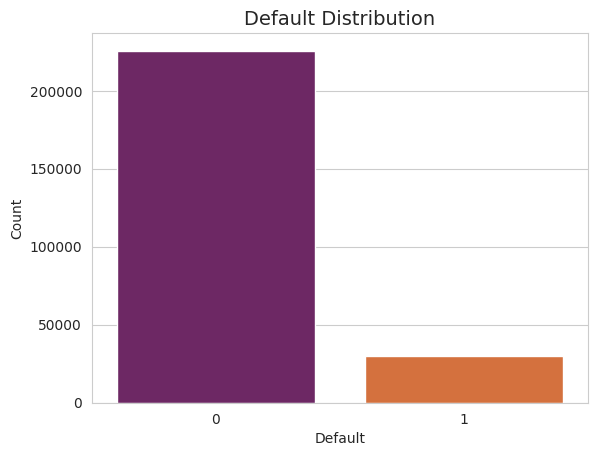

In [23]:
sns. set_style ( 'whitegrid' )
sns.countplot(x = 'Default', data =loan_default_clean, palette = 'inferno')
plt.title('Default Distribution', fontsize = 14)
plt.xlabel('Default', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

- From the chart we can see that the number of people who are not bankrupt is higher. This shows that the data is unbalanced. This is common in the credit industry.

- Using F1-score and ROC-AUC helps ensure that the model does not miss default cases for Logistic Regression, Random Forest and Gradient Boosting models.

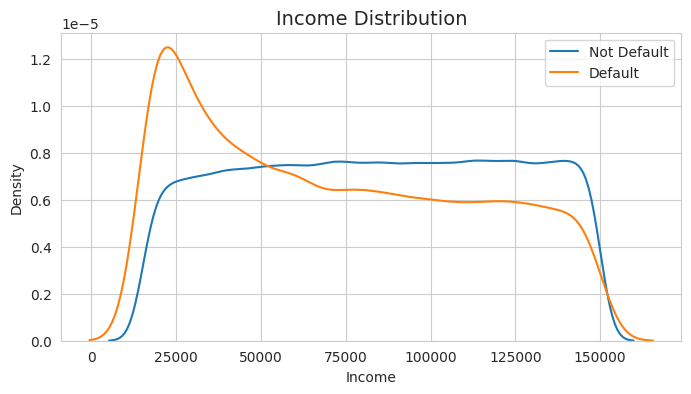

In [24]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 0], x='Income', label='Not Default')
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 1], x='Income', label='Default')

plt.title('Income Distribution', fontsize=14)
plt.xlabel('Income', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

- The chart above shows that the income of the non-default group ranges from 25,000 to 75,000 and the density distribution is almost flat in this range.
- The bankrupt group also has income levels ranging from 25,000 to 75,000, the highest income distribution density is at 25,000 and has a downward trend.
- This shows that people with higher incomes are more likely to be financially strong and less likely to go bankrupt.
- Low income is a major factor contributing to the risk of debt. Especially below 25,000, borrowers have a much higher risk of default.

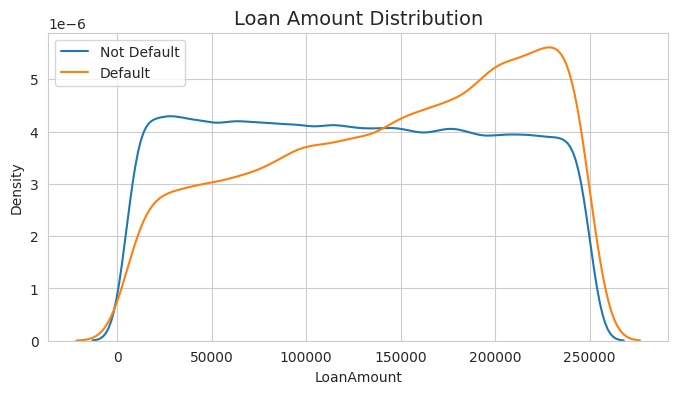

In [25]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 0], x='LoanAmount', label='Not Default')
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 1], x='LoanAmount', label='Default')

plt.title('Loan Amount Distribution', fontsize=14)
plt.xlabel('LoanAmount', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

- The debt-free group typically has a loan size between 0 and under 250,000. The distribution density is stable between 50,000 and under 250,000.
- The default group has loans from 50,000 to 250,000. The distribution density of the default group increases significantly from 100,000 to 250,000.
- In loans under 50000 both groups have similar distribution density.
- This shows that loans from 100000 and above have a higher chance of default. People with large loans have a higher chance of default than those with average loans.
- Large loans are an important factor in default risk: Default pool. Large loans from 100,000 to 250,000 have a higher chance of leading to default.

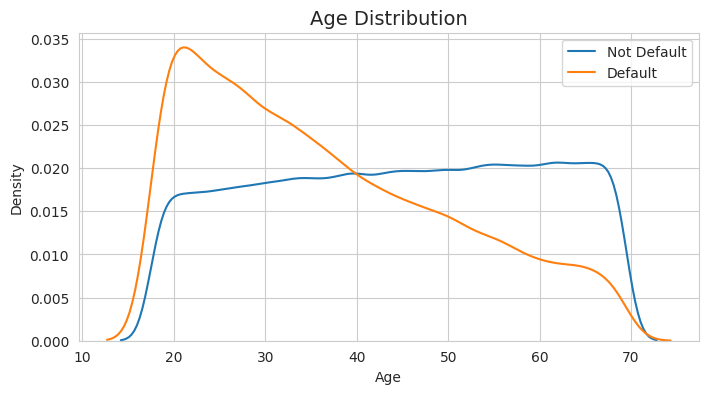

In [26]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 0], x='Age', label='Not Default')
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 1], x='Age', label='Default')

plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

- The non-default group has a distribution density from 20 to under 70. From 30 to 60, the distribution density is relatively stable and decreases significantly after age 70. People over 60 have a fairly high probability of not defaulting.
- The Default group tends to be concentrated in the 20s and 30s. Density peaks around age 20, then declines as age increases.
- Youth (20-30): The Default group has the highest density in this segment, indicating that young people (especially in their 20s) are more likely to default.
- Middle Age (30-60): The Not Default group clearly dominates this segment. This suggests that middle-aged people tend to be debt-free and have more financial stability.
- Old age (>60): The Not Default group still maintains a higher density than the Default group at the age of over 60, indicating that older people are less likely to default.
- Young people are at higher risk of default. Middle-aged and older people are better able to manage their finances.

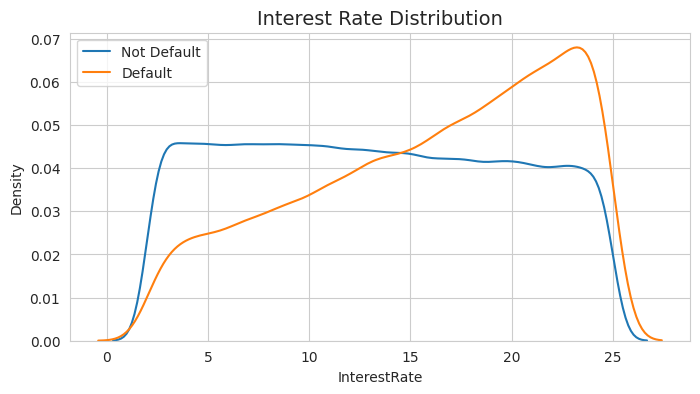

In [27]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 0], x='InterestRate', label='Not Default')
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 1], x='InterestRate', label='Default')

plt.title('Interest Rate Distribution', fontsize=14)
plt.xlabel('InterestRate', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

- The Default group tends to concentrate on high interest rates, especially from 15% to 25%. The distribution density of this group increases steadily from 5 to nearly 25% (peak interest rate).
- The not Default group is concentrated in a fairly even distribution between 5% and 20%.
- nterest rates from 5-15% non-default group have higher density.
- Both groups have low density at interest rates below 5%
- From the 20% interest rate, the Default group has a higher distribution density, whereas the Not Default group tends to decrease when the interest rate increases.
- High interest rates are a major factor in default risk: This chart shows that borrowers with high interest rates (above 20%) are more likely to default. Medium and low interest rates have a low risk of default: Borrowers with interest rates between 5% and 15% are less likely to default.

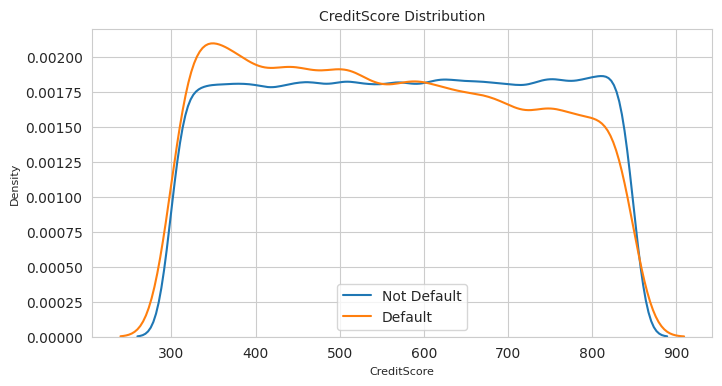

In [28]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 0], x='CreditScore', label='Not Default')
sns.kdeplot(data=loan_default_clean[loan_default_clean['Default'] == 1], x='CreditScore', label='Default')

plt.title('CreditScore Distribution', fontsize=10)
plt.xlabel('CreditScore', fontsize=8)
plt.ylabel('Density', fontsize=8)
plt.legend()
plt.show()

- The Default group has a high concentration of credit scores around 300 - 500.
- The Not Default group is concentrated in the credit score range from 500 - 850> And this group has a high proportion of scores greater than 700
- Both groups have relatively equal density in the credit score range of 500 - 700.
- People with credit scores between 300 and 500 are at higher risk of default. People with credit scores above 700 are at lower risk of default.

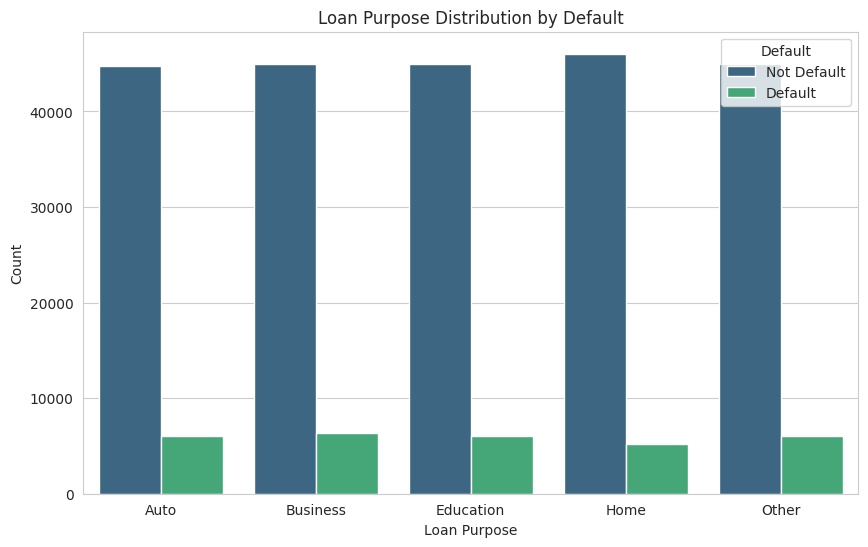

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanPurpose', hue='Default', data=loan_default_clean, palette='viridis')
plt.title('Loan Purpose Distribution by Default')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- n both groups, there is almost equal distribution for all loan purposes, indicating that borrowers with purposes such as Auto, Business, Education, Home, and Other. Loan purpose does not have a significant impact on default.
- Regardless of education level, loan default rates are quite low and there is not a large difference between different education levels.
- The number of non-defaulters is very high across all education levels: This suggests that other factors, such as finances or income, may play a more important role in predicting default.

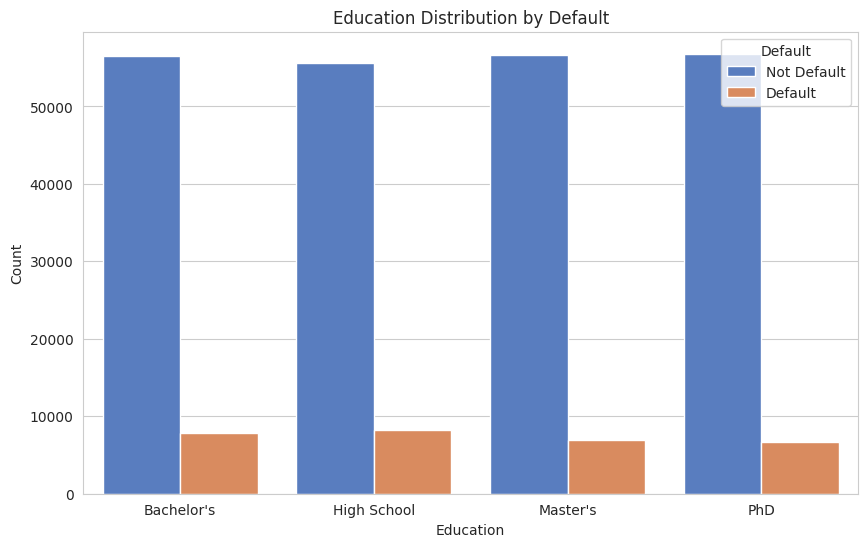

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Default', data=loan_default_clean, palette='muted')
plt.title('Education Distribution by Default')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- People with education levels ranging from High School to PhD tend to be debt free.
- The density distribution ratio of these two groups is relatively even, without too much difference. Education level is not a decisive factor in the possibility of bankruptcy.
- The chart shows that regardless of job type (Full-time, Part-time, Self-Employed, or Unemployed), borrower default rates are low and there is no significant difference between groups.
- The number of non-defaulters is high across all job types: This suggests that factors other than job type may play a larger role in determining a borrower's ability to repay.

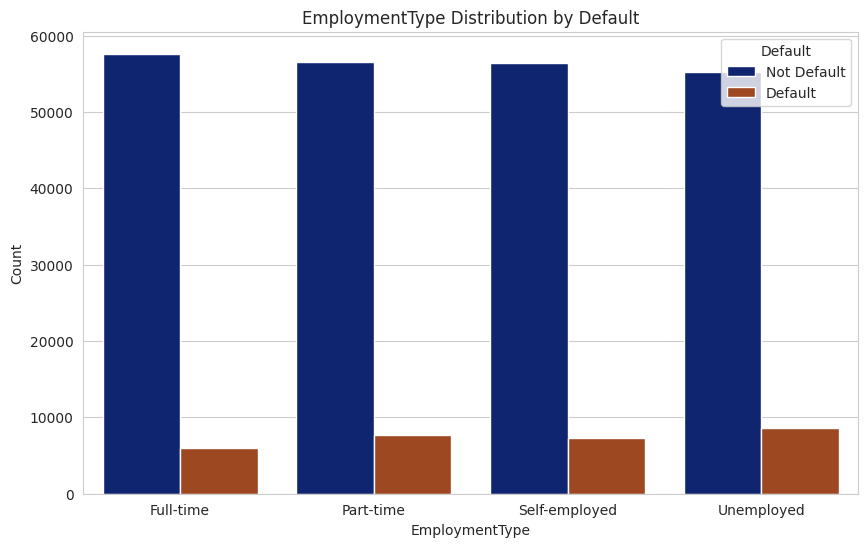

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentType', hue='Default', data=loan_default_clean, palette='dark')
plt.title('EmploymentType Distribution by Default')
plt.xlabel('EmploymentType')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- Both groups have almost equal distribution of this group in job types such as Full-time, Part-time, Self-employed, and Unemployed. This shows that job type does not have a big impact on the rate of wife debt.
- Regardless of whether borrowers were employed full-time, part-time, self-employed, or unemployed, default rates remained relatively uniform across groups.
- The number of non-defaulters is very high: This shows that the majority of borrowers in all types of jobs have good repayment capabilities.

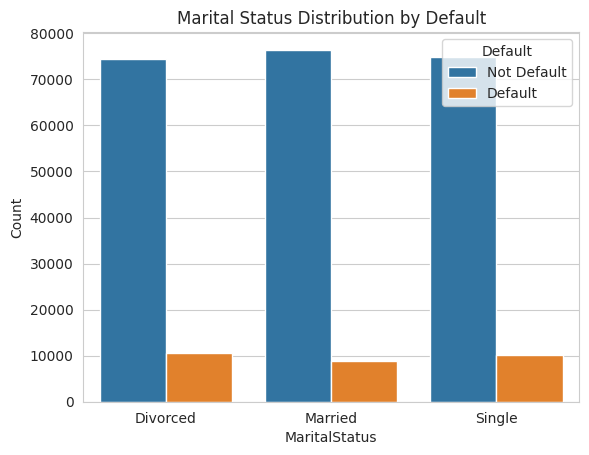

In [32]:
sns.countplot(x='MaritalStatus', hue='Default', data=loan_default_clean)
plt.title('Marital Status Distribution by Default')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- The distribution of both groups is relatively even between the Divorced, Married, and Single groups. Marital status does not significantly affect the default rate.
- The chart shows that, regardless of the borrower's marital status (single, married, or divorced), the default rate is relatively uniform and low compared to the total number of borrowers.
- The number of non-defaulters is very high: The rate of non-defaulters is always much higher than the rate of defaulters, suggesting that marital status is not a major determinant of debt repayment ability.

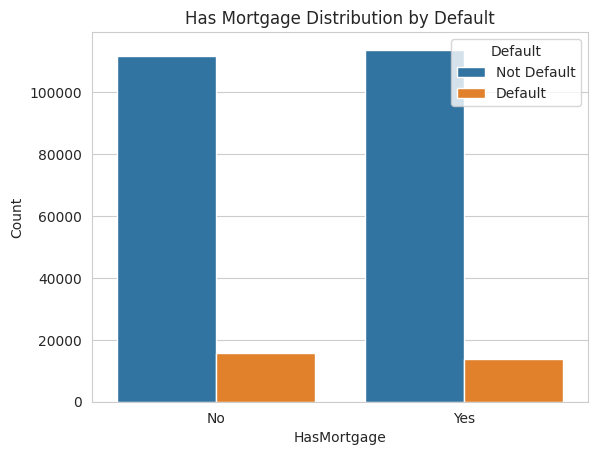

In [33]:
sns.countplot(x='HasMortgage', hue='Default', data=loan_default_clean)
plt.title('Has Mortgage Distribution by Default')
plt.xlabel('HasMortgage')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- The Not Default and Default groups have similar numbers of mortgaged and unmortgaged borrowers, suggesting that having a mortgage is not a major determinant in predicting default risk.

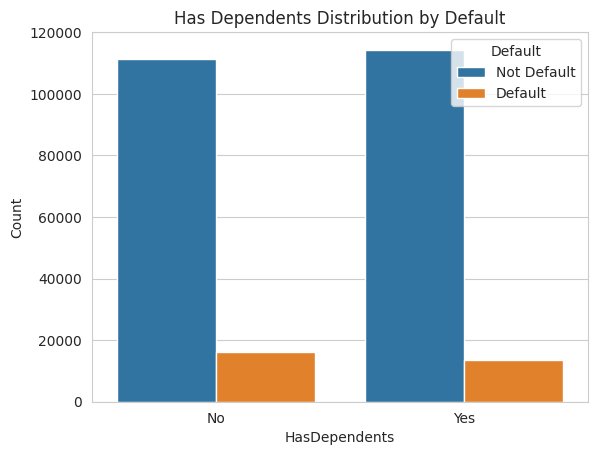

In [34]:
sns.countplot(x='HasDependents', hue='Default', data=loan_default_clean)
plt.title('Has Dependents Distribution by Default')
plt.xlabel('HasDependents')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- The Not Default and Default groups have similar dependents and those without. This suggests that the presence of dependents does not significantly affect default risk.

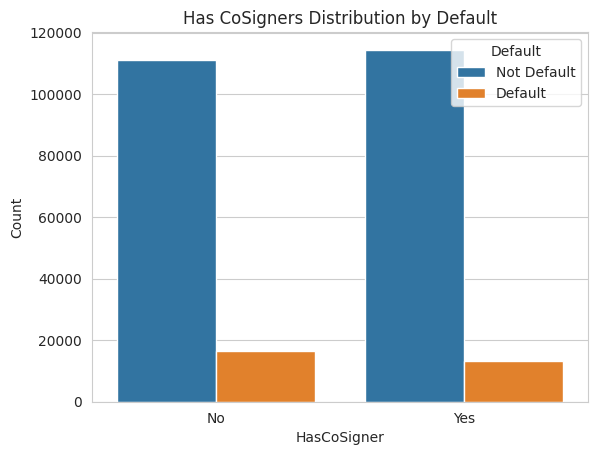

In [35]:
sns.countplot(x='HasCoSigner', hue='Default', data=loan_default_clean)
plt.title('Has CoSigners Distribution by Default')
plt.xlabel('HasCoSigner')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.show()

- Both groups were similar in terms of having cosigners. This suggests that having a cosigner does not significantly affect the likelihood of default.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


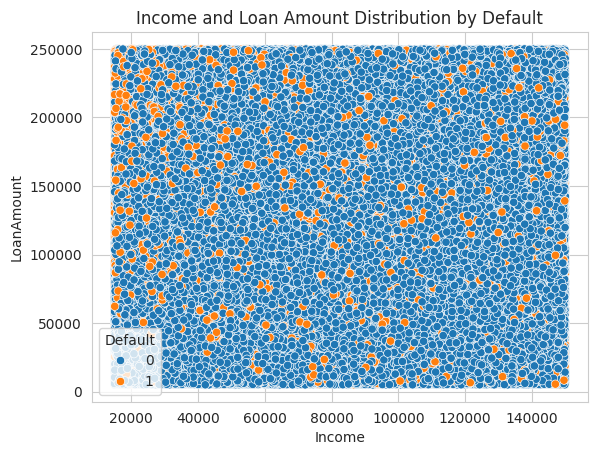

In [36]:
sns.scatterplot( x = 'Income' , y = 'LoanAmount', data =loan_default_clean, hue = 'Default')
plt.title('Income and Loan Amount Distribution by Default')
plt.show()

- The Not Default group dominates the chart, ranging from high to low money and high to low loan amounts.
- The Default group has a more sparse dispersion, it can be seen that defaulted borrowers appear at both different income levels and loan amounts. Concentrated in large loans and low incomes, which suggests that people with low incomes and large loans are more likely to default.
- People with higher incomes also have cases of default, which shows that high income does not always guarantee avoiding the risk of default.
- Borrowers with low incomes and large loans are more likely to default: Although default rates are not entirely concentrated in a particular area, there are indications that large loans combined with low incomes tend to lead to a higher risk of default.
- Defaults can happen even to high-income earners: The chart shows that there are cases of defaults that occur even among high-income borrowers, demonstrating that there are factors other than income that play an important role in the ability to repay debt.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


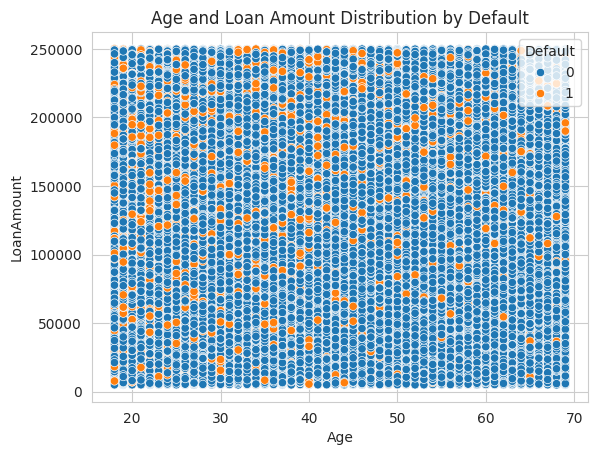

In [37]:
sns.scatterplot( x = 'Age' , y = 'LoanAmount', data =loan_default_clean, hue = 'Default')
plt.title('Age and Loan Amount Distribution by Default')
plt.show()

- Borrowers under 30 years old, loans over 100,000 come with a higher risk of default
- The over 50s group shows low default rates even on large loans
- Across all age groups, loans under $100,000 tend to have a low risk of default, suggesting these loans are within a manageable range.

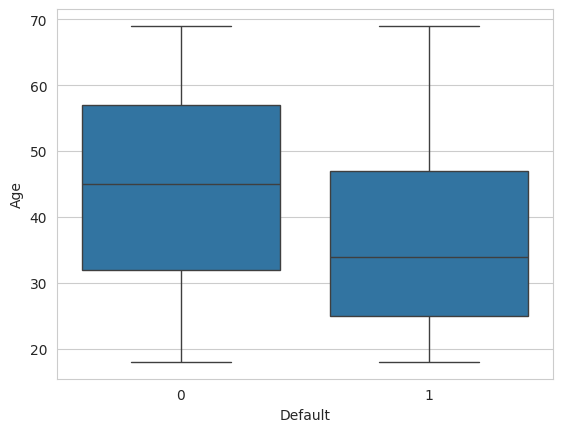

In [38]:
sns.boxplot(x='Default', y='Age', data=loan_default_clean)
plt.show()

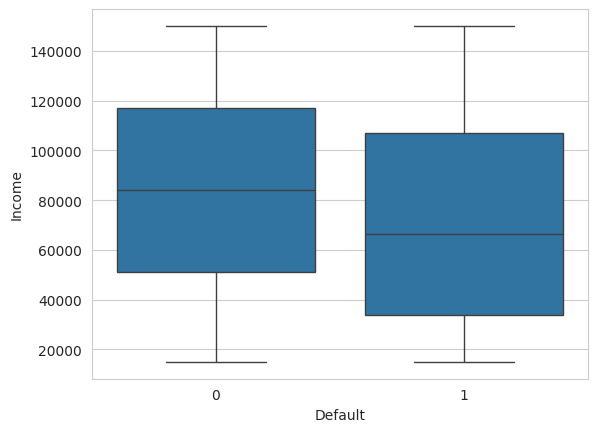

In [39]:
sns.boxplot(x='Default', y='Income', data=loan_default_clean)
plt.show()

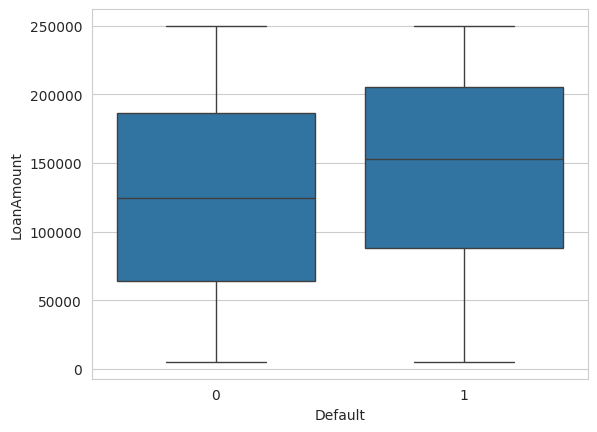

In [40]:
sns.boxplot(x='Default', y='LoanAmount', data=loan_default_clean)
plt.show()

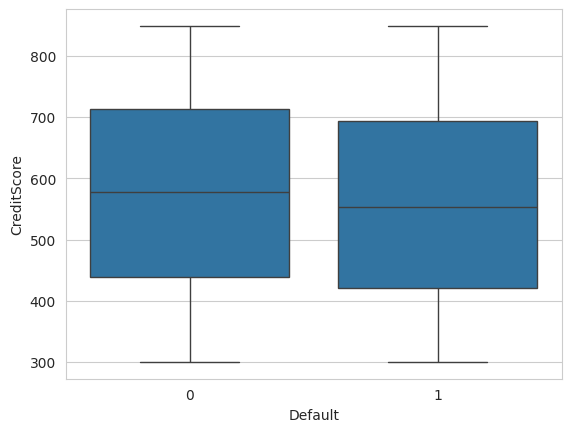

In [41]:
sns.boxplot(x='Default', y='CreditScore', data=loan_default_clean)
plt.show()

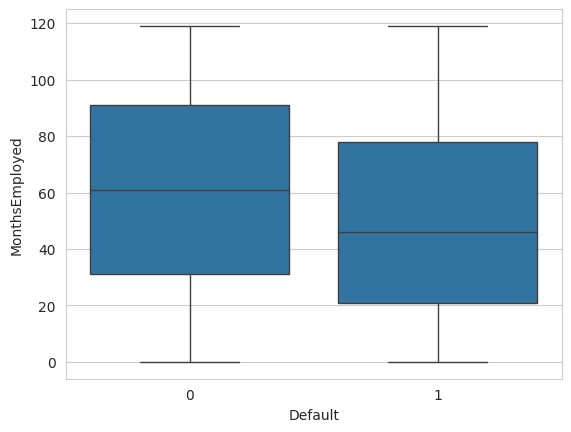

In [42]:
sns.boxplot(x='Default', y='MonthsEmployed', data=loan_default_clean)
plt.show()

- The Not Default group shows that the median number of months worked for this group is around 70 months (about 6 years). The box containing the majority of the data ranges from 40 months to 100 months. This shows that the majority of non-defaulters have been working for a fairly long time, from 3 to 8 years. The range for this group is from 0 months to 120 months.
- The Default group shows that the median number of months worked for this group is around 60 months (5 years). The box section of the default group is mostly between 30 months and 90 months. The data for this group is less scattered, ranging from 0 months to about 110 months, but is mostly concentrated between 30 and 90 months..
- The Not Default group has more months of work than the Default group.
- Number of months of employment is less related to default: Borrowers with less employment (less than 60 months) are more likely to default

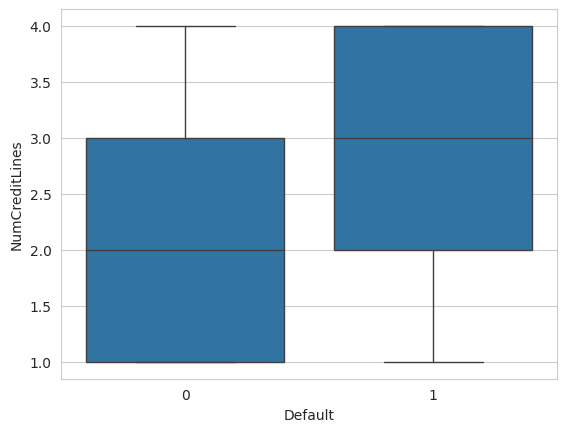

In [43]:
sns.boxplot(x='Default', y='NumCreditLines', data=loan_default_clean)
plt.show()

- The Not Default group shows an average credit line count of 2.5. The box section contains the majority of the data that falls between 2 and 3.5 credit lines. The range is from 1 to 4 credit lines, indicating that this group has mostly moderate and stable credit lines.
- The Default group has a higher median number of credit lines, around 3 credit lines. The Default group data has a wider distribution, with the majority of the data falling between 1 and 4 credit lines. The number of credit lines in this group has greater variability.
- People with multiple lines of credit have a higher risk of default.

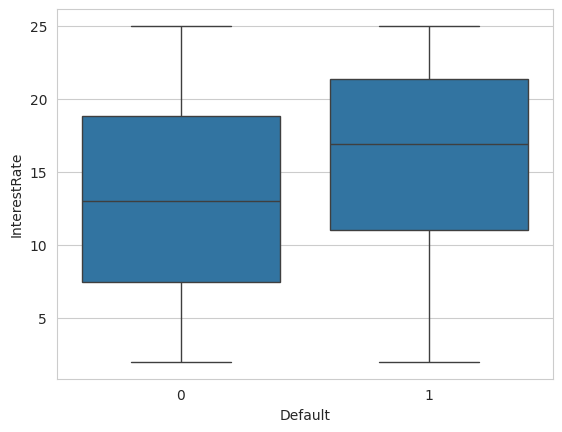

In [44]:
sns.boxplot(x='Default', y='InterestRate', data=loan_default_clean)
plt.show()

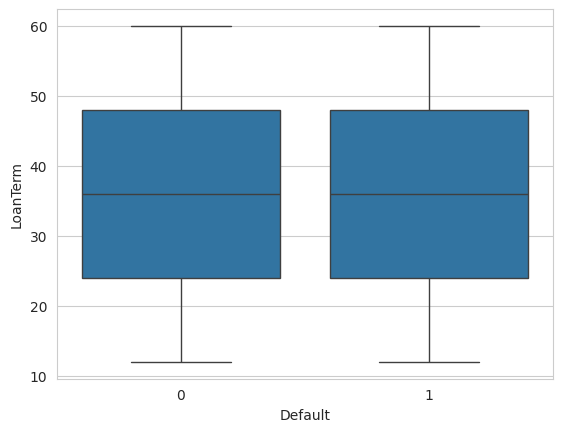

In [45]:
sns.boxplot(x='Default', y='LoanTerm', data=loan_default_clean)
plt.show()

- The chart shows that there is no significant difference between the two groups in terms of loan tenure. Both groups have an average tenure of around 35 months, and the range of their loan tenures is also similar (from 10 to 60 months). This suggests that loan tenure may not be an important factor in determining a borrower’s likelihood of default.

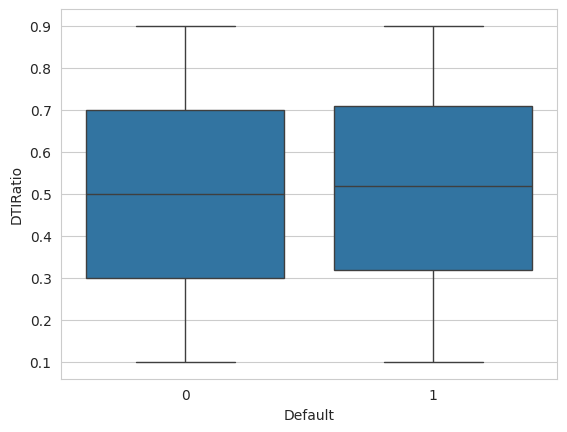

In [46]:
sns.boxplot(x='Default', y='DTIRatio', data=loan_default_clean)
plt.show()

- Both groups have a box line showing a mean DTI ratio lag of 0.5 (50%). The box contains the majority of the data between 0.35 and 0.65. The data range from 0.1 to 0.9.
- Debt-to-income ratio is not a big factor in influencing default risk: The chart shows that there is no big difference between the default and non-default groups in terms of DTI ratio. This means that borrowers with high debt-to-income ratios are not necessarily going to default, and vice versa.

### **label encoder**

Use LabelEncoder from sklearn library to convert binary categorical columns like HasMortgage, HasDependents, and HasCoSigner to be converted into 0s and 1s. Binary variables (yes/no) will be labeled as 0 or 1. The aim is to keep the order of classes without adding redundant columns.

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
categorical_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in categorical_columns:
    loan_default_clean[col] = le.fit_transform(loan_default_clean[col])

**One hot encoding**

The Education, EmploymentType, MaritalStatus, and LoanPurpose columns have more than two variables so I will use One-Hot encoding to convert the categorical variables into multiple binary columns.

When performing One-Hot Encoding, a phenomenon called multicollinearity can occur. To avoid this phenomenon, we use the parameter drop_first=True.

In [49]:
categorical = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

loan_default_clean = pd.get_dummies(loan_default_clean, columns=categorical, drop_first=True).astype(float)

Check the data type again

In [50]:
loan_default_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  float64
 1   Income                        255347 non-null  float64
 2   LoanAmount                    255347 non-null  float64
 3   CreditScore                   255347 non-null  float64
 4   MonthsEmployed                255347 non-null  float64
 5   NumCreditLines                255347 non-null  float64
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  float64
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  float64
 10  HasDependents                 255347 non-null  float64
 11  HasCoSigner                   255347 non-null  float64
 12  Default                       255347 non-nul

In [51]:
loan_default_clean.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

### **Correlation Matrix**

In [52]:
Correlation_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default']

correlation_matrix = loan_default_clean[Correlation_columns].corr()
correlation_matrix

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,0.000035,0.000710,-0.002918,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.000945,-0.001570,-0.003524,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,-0.000801,0.000139,-0.001848,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,0.001728,-0.003018,-0.002755,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,0.000210,0.001450,0.001045,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,-0.001744,-0.001895,0.002105,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,-0.000424,-0.000243,-0.003991,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.001775,0.002417,-0.001166,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.000231,0.001492,0.000373,0.019236
HasMortgage,0.000035,-0.000945,-0.000801,0.001728,0.000210,-0.001744,-0.000424,0.001775,0.000231,1.000000,0.000067,-0.003529,-0.022856


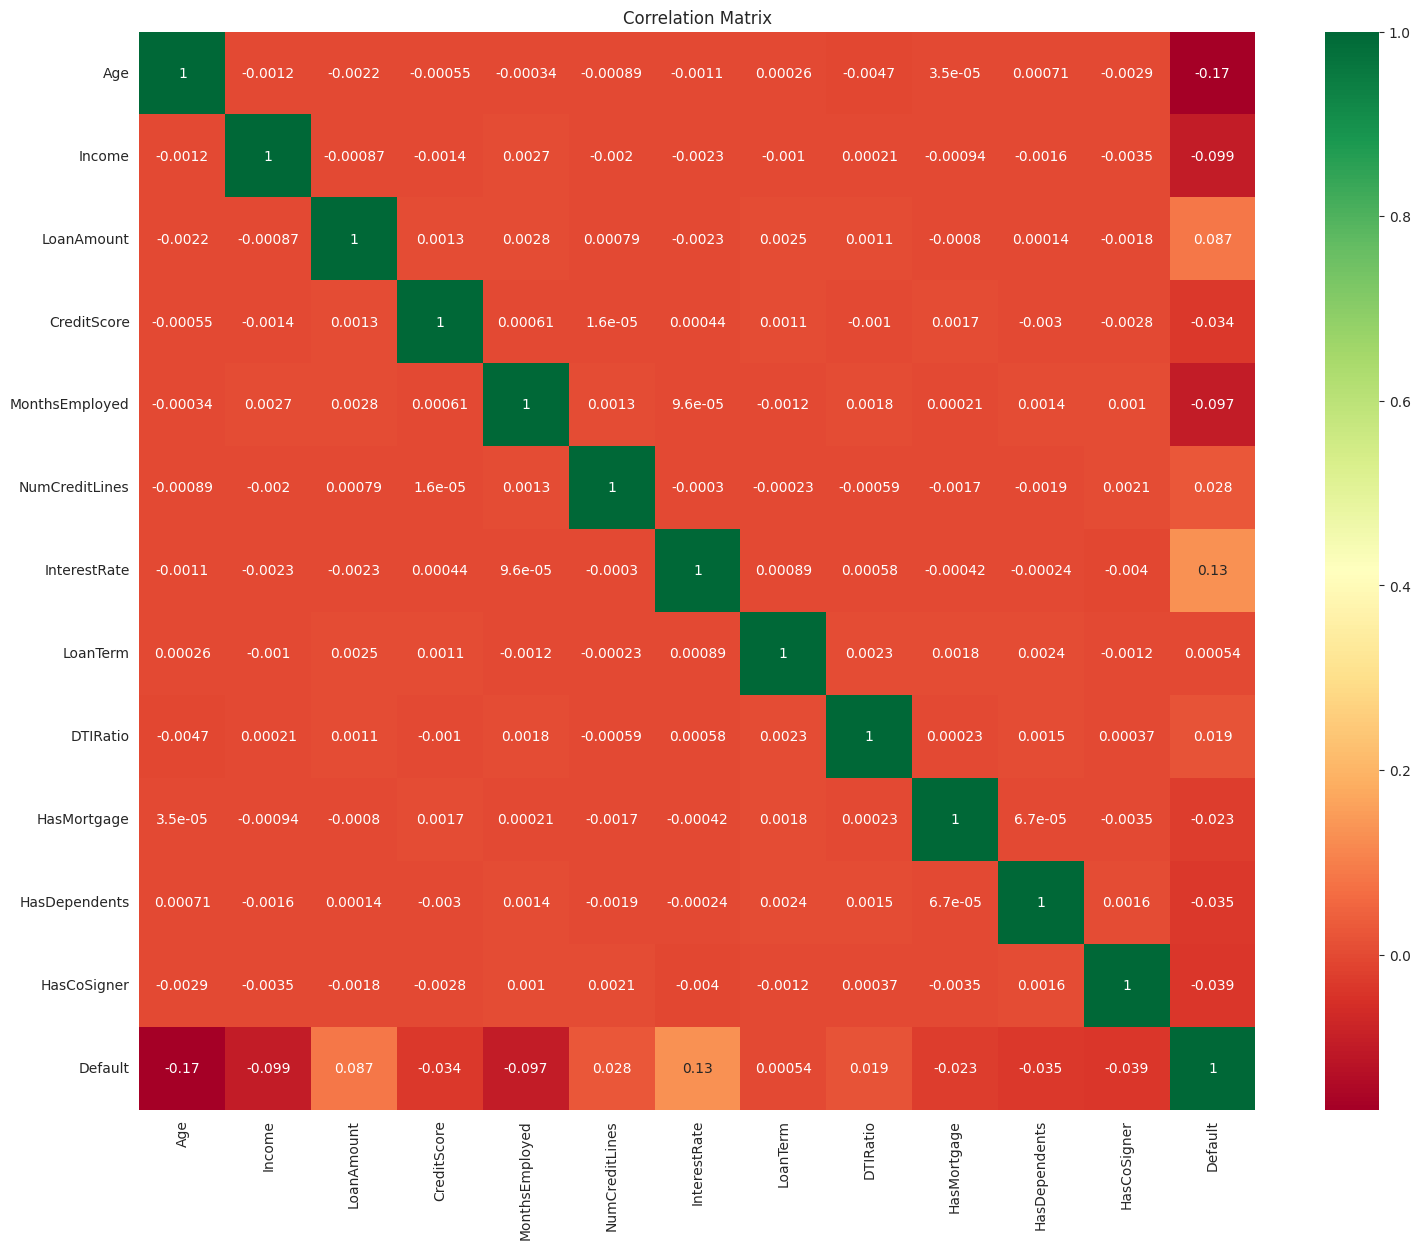

In [53]:
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

- Age: Has a negative correlation (-0.17) with the Default variable. This means that as age increases, the probability of default decreases.
- Income: Has a negative correlation (-0.099) with Default. As income increases, the probability of default decreases.
- LoanAmount: Has a positive correlation (+0.087) with Default. This shows that as the loan amount increases, the probability of default also tends to increase.
- InterestRate: Has a positive correlation (+0.13) with Default, meaning that as interest rates increase, the probability of default also increases. This is an important factor.
- HasCoSigner (Has a co-signer): Negative correlation (-0.039) with Default, which suggests that having a co-signer reduces the likelihood of default.
- Months Employed, DTI Ratio, and other factors: Correlation is very weak or close to zero, indicating little impact on default probability.

In [54]:
Correlation_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'Education_High School',
       "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']

correlation_matrix = loan_default_clean[Correlation_columns].corr()
correlation_matrix

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,0.000035,...,-0.001293,-0.002659,-0.000082,0.001620,0.001888,-0.002838,-0.003104,-0.002300,-0.000474,0.004286
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.000945,...,-0.003124,-0.001635,-0.000778,-0.003362,-0.000821,0.000962,0.005124,-0.003610,-0.001250,-0.000388
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,-0.000801,...,0.001989,-0.002038,-0.001157,0.004083,-0.003279,0.000973,-0.003093,0.000472,0.000308,0.000358
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,0.001728,...,0.001303,-0.000615,0.001508,0.002214,0.000106,-0.002839,-0.000638,-0.003306,0.002513,0.000451
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,0.000210,...,-0.002695,0.001363,0.000678,-0.000421,0.001055,-0.000611,0.001518,0.001159,-0.004033,-0.000208
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,-0.001744,...,0.001928,0.000170,0.000745,-0.000365,0.000726,-0.000938,0.000988,0.002040,0.000366,-0.001244
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,-0.000424,...,0.002913,0.000283,-0.001022,0.001038,-0.001474,-0.003660,-0.001029,0.001493,0.002580,-0.001128
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.001775,...,-0.001391,0.000514,-0.002749,0.002330,-0.000094,-0.000855,-0.003032,0.000942,-0.000316,0.003051
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.000231,...,0.000539,0.000894,-0.000336,-0.000572,-0.000370,0.004075,0.000481,0.002513,-0.001672,-0.003497
HasMortgage,0.000035,-0.000945,-0.000801,0.001728,0.000210,-0.001744,-0.000424,0.001775,0.000231,1.000000,...,-0.000007,0.000083,0.002500,-0.000667,0.001259,-0.000983,-0.002223,0.001407,-0.001773,-0.000719


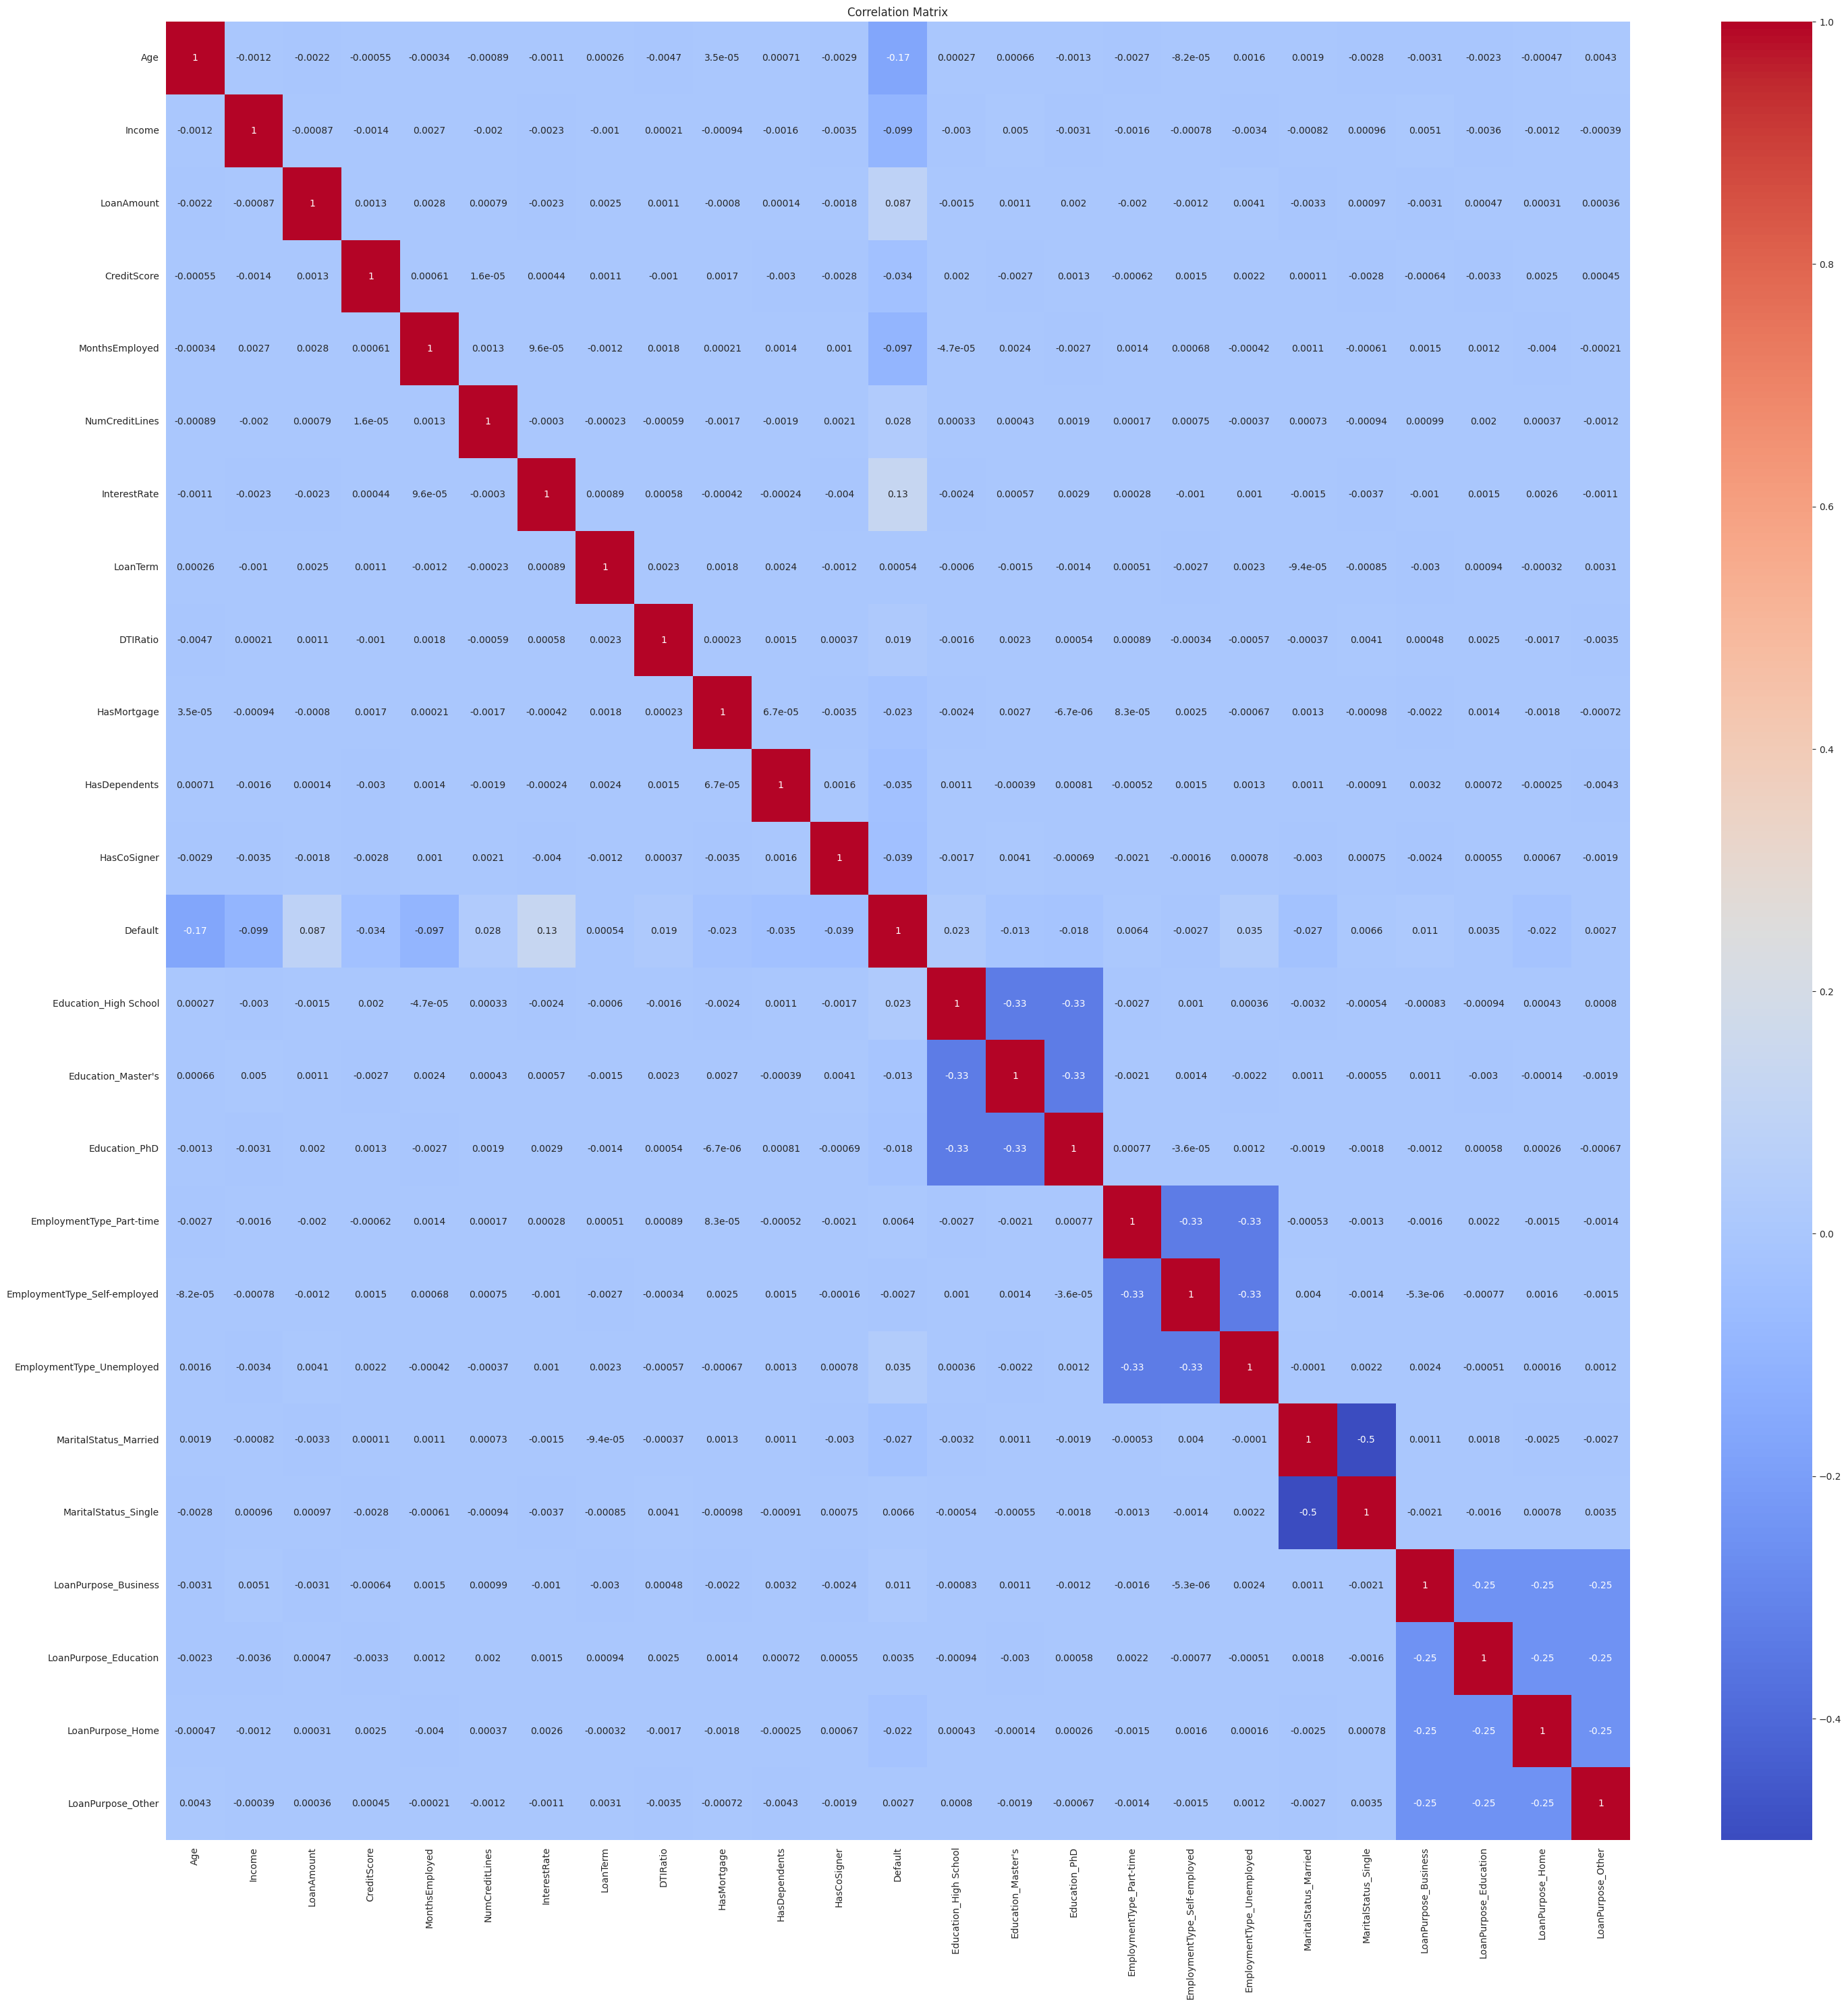

In [55]:
plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- InterestRate and Default: There is a significant positive correlation (+0.13). This shows that as interest rates increase, the probability of default (Default) also increases.
- Age and Default: There is a negative correlation (-0.17), showing that as age increases, the probability of default decreases.
- Income and Default: There is a negative correlation (-0.099), the higher the income, the lower the probability of default.
- LoanAmount and Default: There is a positive correlation (+0.087), the higher the loan amount, the higher the probability of default.
- NumCreditLines, LoanTerm, DTIRatio, and some other categorical variables (such as marital status, education) do not have a significant effect on the probability of default.
- Variables that are strongly correlated with Default such as InterestRate, Age, Income, and LoanAmount may be important variables in building a predictive model.

# **3. Modeling**

**Model training**

In the process of building and evaluating machine learning models, a very important step is to divide the dataset into 2 parts with a ratio of 80-20: 80% of the data will be used to train the model (training set), and the remaining 20% ​​will be used to test the model (testing set). Ensure that there is enough data for the model to learn comprehensively and enough data to test the model's generalization ability.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = loan_default_clean.drop('Default', axis = 1)
y = loan_default_clean['Default']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (204277, 24)
Testing set shape: (51070, 24)


## **3.1. Logistic Regression**

**F1-Score**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score,classification_report, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

In [65]:
# Create Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [66]:
# Prediction on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [67]:
# Calculate F1-Score and AUC-ROC
f1_logistic = f1_score(y_test, y_pred)
auc_logistic = roc_auc_score(y_test, y_pred_proba)
print(f"F1-Score : {f1_logistic:f}")
print(f"AUC: {auc_logistic:f}")
print(classification_report(y_test, y_pred))

F1-Score : 0.012429
AUC: 0.728928
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.69      0.01      0.01      5900

    accuracy                           0.88     51070
   macro avg       0.79      0.50      0.48     51070
weighted avg       0.86      0.88      0.83     51070



- F1-Score is 0.012429 which is a very low index
- AUC is 0.72 which shows that the model has a fairly good discrimination ability.
- For the non-default group, the precision is 0.89, which shows that in the "Non-Default" predictions, 89% are correct. Recall is 1 1.00, which means that all "Non-Default" cases are correctly identified. Besides, the high F1 index (0.94) shows that the model is very effective in identifying the "Non-Default" class.
- For the default group, the precision is 0.69, which means that in the "Default" predictions, only 69% are correct. Recall of 0.01 shows that the model only correctly identifies 1% of all real-world "Default" cases and the very low F1-Score (0.01) shows that the model is almost ineffective in identifying the "Default" class.

The model is performing well with the "Non-Default" class but is almost unable to correctly identify the "Default" class.

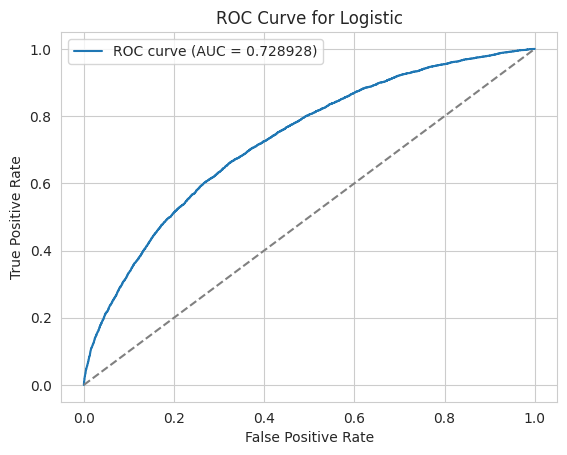

In [68]:
# Plot the ROC curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_logistic, tpr_logistic, label=f"ROC curve (AUC = {auc_logistic:f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic')
plt.legend()
plt.show()

- The ROC curve shows the relationship between TPR and FPR at various decision thresholds.
- The gray diagonal line is the reference line when the model predicts randomly (AUC = 0.5). The further away from this diagonal line and closer to the upper left corner of the model's ROC curve, the better the model.
- With AUC = 0.728928, your model discriminates between classes better than random prediction, but there is still room for improvement, especially considering the very low F1-Score and Recall results for the "default" class.

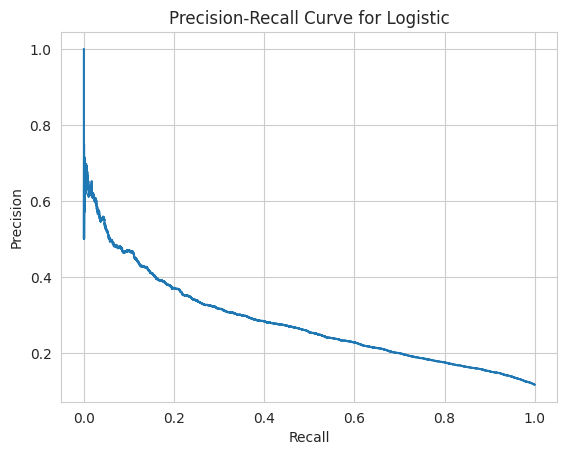

In [69]:
# Plot the Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic')
plt.show()

- The graph shows that as recall increases (and more defaults are detected), precision decreases, Precision is very low when Recall is high, indicating that the model is having difficulty maintaining accuracy when detecting many defaults.
- When Recall is low, Precision is high, meaning that when the model only focuses on a small number of clear defaults, it can maintain better accuracy
- This curve is not close to the upper right corner, indicating that the model has not achieved a good balance between Precision and Recall. This may be because the current model cannot distinguish well between the "default" and "non-default" classes, especially due to data imbalance.

Based on the above comments, to improve the finding of a suitable model, I will experiment with models such as Random Forest or Gradient Boosting and consider adding new features that can improve the model's recognition ability.

## **3.2. Random Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Building Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Model prediction and evaluation
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [73]:
 # Calculating F1-Score, AUC and Precision-Recall for Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f'F1-score: {f1_rf:f}')
print(f'AUC-ROC: {auc_rf:f}')
print(classification_report(y_test, y_pred_rf))

F1-score: 0.061509
AUC-ROC: 0.731634
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.68      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



- The overall F1-Score is 0.061509, which is a slight improvement from the previous result, but still low. This shows that the model still has difficulty in balancing between Precision and Recall.
- AUC-ROC is 0.731634, a slight increase from the previous result. The AUC above 0.7 shows that the model has a better ability to distinguish between the two classes, but there is still room for improvement.
- For the default group, the precision is 0.89 – indicating that 89% of the predictions are correct. Recall is 1.00 – the model correctly identifies all the "Not Default" cases 100%. In addition, a high F1-score (0.94) means good performance in classifying "Not Default" cases
- In the default group, the accuracy of predicting "Default" cases is 68%. The low F1-score of 0.06 shows that the model is still weak in correctly classifying “default” cases.

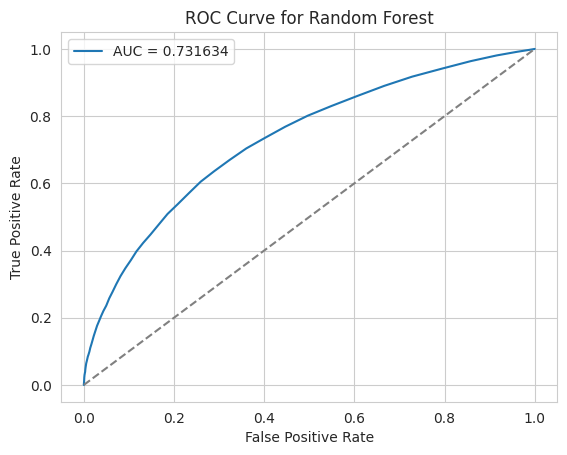

In [74]:
# Plot the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

- AUC = 0.731634 shows that the Random Forest model has a moderate ability to distinguish between positive (default) and negative (non-default) classes.
- The Random Forest model achieves a better AUC than the Logistic Regression model (compared to previous results), indicating that the model has a better classification performance.


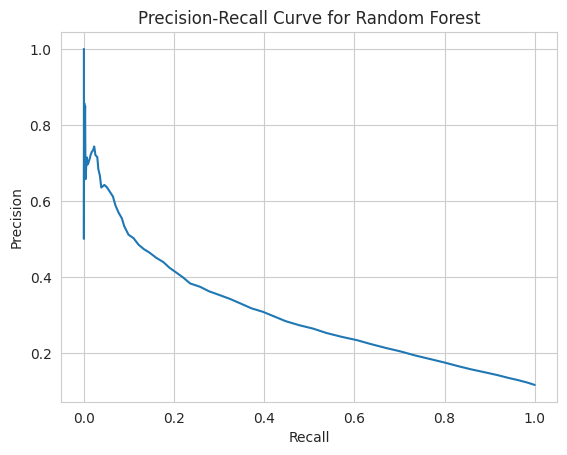

In [75]:
# Draw Precision-Recall lines
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.plot(recall_rf, precision_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.show()

- At the top of the chart, when Recall is very low, Precision is high (close to 1). This means that when the model focuses only on predicting obvious “default” cases, it can predict accurately. However, this leads to missing many “default” cases when Recall is low.
- When Recall (x-axis) increases, Precision (y-axis) decreases, which means that when the model tries to identify more positive cases (increase Recall), it will accept more positive predictions, increasing the number of false positives, thus decreasing Precision.
- When Recall approaches 1.0, Precision drops to low (below 0.2). This indicates that if the model tries to identify all positive cases, it will make many wrong predictions, resulting in low Precision. This shows that the model cannot maintain a good balance between Precision and Recall at high levels.

## **3.3. Gradient Boosting**

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
# Building a Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [78]:
# Prediction on test set
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

In [79]:
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"F1-score: {f1_gb:f}")
print(f"AUC-ROC: {auc_gb:f}")
print(classification_report(y_test, y_pred_gb))

F1-score: 0.094595
AUC-ROC: 0.757515
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.65      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



- The overall F1-Score of the model is 0.094595, which has increased compared to the previous results but is still low.
- The AUC is 0.757515, which is an improvement compared to the previous results, indicating that the model is better at distinguishing between the "default" and "non-default" classes.
- For the non-default class, the correct prediction of "non-default" cases is 89%. Recall is 1.00, the model correctly identifies all "non-default" cases. The high F1-score of 0.94 indicates that the model is very effective in identifying the "non-default" class.
- For the default class, the "default" predictions are only 65% ​​correct (precision is 0.65). With recall of 0.05, the model only correctly identifies 5% of all actual "default" cases.

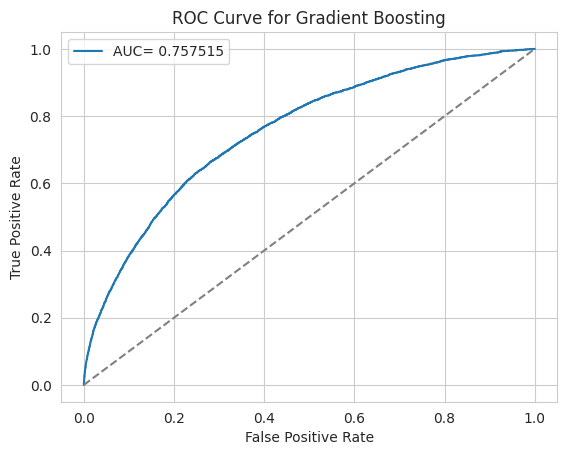

In [80]:
# Plot the ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'AUC= {auc_gb:f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend()
plt.show()

- True Positive Rate (TPR) (y-axis): Represents the Recall of the model, which is the proportion of actual positive cases (defaults) that are correctly identified.
- False Positive Rate (FPR) (x-axis): Is the proportion of actual negative cases (non-defaults) that are incorrectly predicted as positive.
- With AUC = 0.757515, the Gradient Boosting model is able to distinguish between classes (defaults and non-defaults) better than random (AUC = 0.5) and has reached a fairly average level. An AUC above 0.75 is a positive sign that the model can distinguish between two classes

The Gradient Boosting model achieved higher AUC than the logistic regression or Random Forest models in the previous results, indicating better performance in discriminating between the two classes.

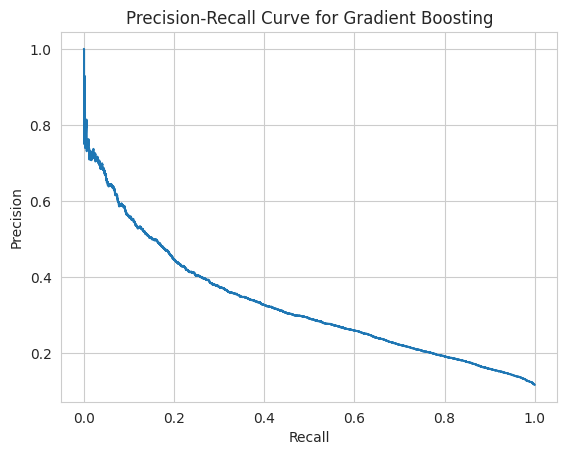

In [81]:
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba_gb)
plt.plot(recall_gb, precision_gb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()

- This curve shows that as Recall increases, Precision decreases. This means that as the model tries to cover more positive cases (increase Recall), it also predicts more False Positives, reducing Precision.
- At the top of the graph, when Recall is very low, Precision is high (close to 1.0). This indicates that when the model only recognizes a small fraction of "default" cases (the most obvious ones), it can maintain high precision
- As Recall approaches 1.0, Precision drops below 0.2, indicating that if the model tries to cover all "default" cases, the rate of correct predictions will drop very low.

The Precision-Recall plot of Gradient Boosting shows that the model does well in maintaining high Precision when Recall is low, but struggles when trying to cover all positive cases.

## **3.4. So Sánh model**

<ipython-input-82-b7e1ec4119ef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Type', y='F1-Score', data=df, palette='Greens_d')
<ipython-input-82-b7e1ec4119ef>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Type', y='AUC-ROC', data=df, palette='Greens_d')


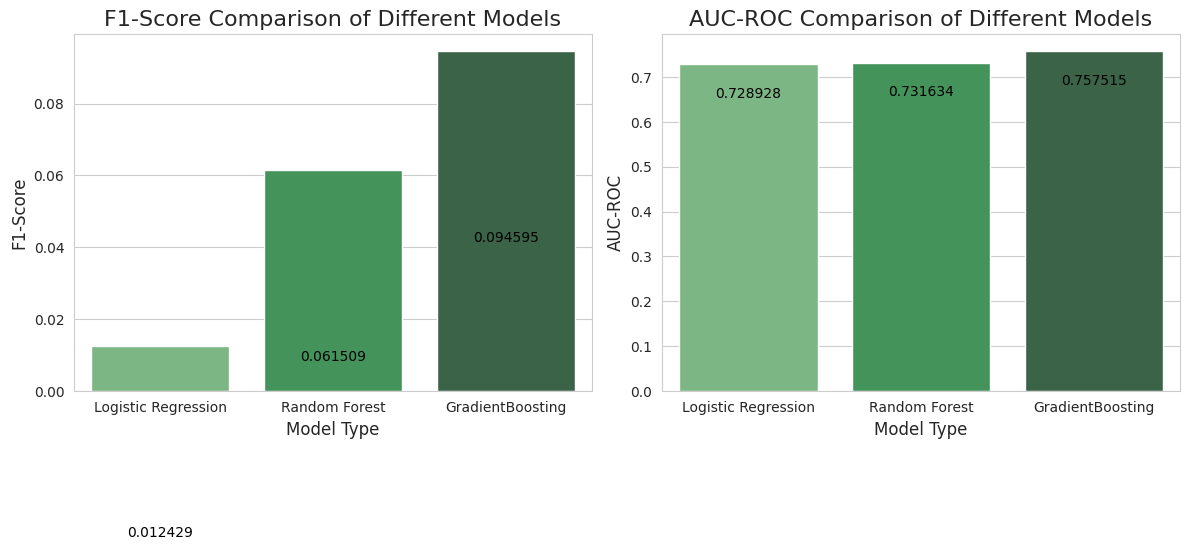

In [82]:
# F1-Score and AUC data for models
model_types = ['Logistic Regression', 'Random Forest', 'GradientBoosting']
f1_scores = [0.012429, 0.061509, 0.094595]
auc_scores = [0.728928, 0.731634, 0.757515]

# Create a DataFrame containing information about the models
df = pd.DataFrame({
    'Model Type': model_types,
    'F1-Score': f1_scores,
    'AUC-ROC': auc_scores
})

# Plot a bar chart comparing F1-Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model Type', y='F1-Score', data=df, palette='Greens_d')
bars = plt.gca().patches
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, str(yval), ha='center', va='top', color='black')
plt.title('F1-Score Comparison of Different Models', fontsize=16)
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)

# Plot AUC-ROC comparison bar chart
plt.subplot(1, 2, 2)
sns.barplot(x='Model Type', y='AUC-ROC', data=df, palette='Greens_d')
bars = plt.gca().patches
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, str(yval), ha='center', va='top', color='black')
plt.title('AUC-ROC Comparison of Different Models', fontsize=16)
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('AUC-ROC', fontsize=12)

plt.tight_layout()
plt.show()


- Logistic Regression: F1-Score is 0.012429, which is very low. This shows that the Logistic Regression model has poor classification ability with the "default" class in this imbalanced data problem, and the AUC-ROC is 0.728928, which is quite good, but the classification performance is still low.
- Random Forest F1-Score is 0.061509, which is improved compared to Logistic Regression but still low, showing that this model still has difficulty in accurately identifying the "default" class, and the AUC is 0.731634, slightly higher than Logistic Regression, showing better discrimination ability.
- Gradient Boosting has an F1-Score of 0.094595, the highest among the three models, showing better classification ability, and 0.757515, the highest among the three models, showing that Gradient Boosting has the best ability to distinguish between the "default" and "non-default" classes among the comparison models.

Gradient Boosting is the best model among the three models for this problem, achieving the highest F1-Score and AUC-ROC

# **4. Results and Insights**

- **Income and loan amount play an important role in default risk**. People with low incomes and large loans tend to default more easily.
- Although high incomes are often associated with good repayment performance, there are some cases of defaults even when borrowers have high incomes. This suggests that factors other than income should be considered to more accurately assess the risk of default.
- **High interest rates are closely related to default risk**. Borrowers with high interest rates (above 20%) have a much higher risk of default than those with low or medium interest rates. This suggests that financial institutions should be cautious when providing loans with high interest rates, possibly requiring additional collateral or conducting more thorough checks on the borrower's financial capacity.
- **Credit score is an important indicator of default risk**. People with low credit scores (below 500) are more likely to default. This highlights the importance of credit scores in the loan underwriting process. People with high credit scores (above 700) are more likely to repay their loans, and therefore may enjoy better or less risky loan terms.
- Marital status, loan purpose, education level, and type of employment are not major determinants of default risk. This suggests that financial institutions do not need to focus too much on these factors to use in assessing default risk.- Default risk depends heavily on financial factors such as income, loan amount, interest rate, and credit score. Financial institutions need to pay special attention to these factors to more accurately assess the borrower's ability to repay.
- Non-financial factors such as marital status, type of employment, education level and purpose of borrowing do not have a significant impact on default risk, and therefore should not be considered important factors when assessing loans.

Gradient Boosting is the best model among the three models for this default problem by achieving the F1-Score and AUC-ROC metrics.